In [0]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Flatten,MaxPooling2D, Dropout
import tensorflow as tf
import keras

In [0]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [0]:
(x_train2, y_train2), (x_test2, y_test2) = tf.keras.datasets.mnist.load_data()

In [0]:
model = Sequential()

In [0]:
model.add(Conv2D(28, kernel_size=(5,5), input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,  activation='softmax'))


In [0]:
model2 = Sequential()
model2.add(Conv2D(32, kernel_size=(5,5), input_shape=(28,28,1)))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Conv2D(64, kernel_size=(5,5)))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Flatten())
model2.add(Dense(1024, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(10,  activation='softmax'))

In [186]:
print(model.summary())

Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_55 (Conv2D)           (None, 24, 24, 28)        728       
_________________________________________________________________
max_pooling2d_51 (MaxPooling (None, 12, 12, 28)        0         
_________________________________________________________________
flatten_30 (Flatten)         (None, 4032)              0         
_________________________________________________________________
dense_59 (Dense)             (None, 128)               516224    
_________________________________________________________________
dropout_30 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_60 (Dense)             (None, 10)                1290      
Total params: 518,242
Trainable params: 518,242
Non-trainable params: 0
_______________________________________________

In [0]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [0]:
model2.compile(optimizer=keras.optimizers.Adam(lr=0.001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [0]:
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False)
y_train = y_train.reshape([60000, 1])
y_train = onehot_encoder.fit_transform(y_train)
y_test = y_test.reshape([y_test.shape[0], 1])
y_test = onehot_encoder.fit_transform(y_test)

In [0]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],x_train.shape[2],1 )
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],x_test.shape[2],1 )
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [0]:
x_train.shape

(60000, 28, 28, 1)

In [191]:
model2_details=model2.fit(x_train, y_train,
                       batch_size=100,
                       epochs=35,
                       validation_data=(x_test,y_test),
                       verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/35
60000/60000 [==============================] - 7s 115us/step - loss: 0.4133 - acc: 0.8730 - val_loss: 0.1117 - val_acc: 0.9652
Epoch 2/35
60000/60000 [==============================] - 5s 76us/step - loss: 0.0956 - acc: 0.9692 - val_loss: 0.0687 - val_acc: 0.9785
Epoch 3/35
60000/60000 [==============================] - 5s 76us/step - loss: 0.0621 - acc: 0.9806 - val_loss: 0.0464 - val_acc: 0.9842
Epoch 4/35
60000/60000 [==============================] - 5s 76us/step - loss: 0.0473 - acc: 0.9853 - val_loss: 0.0429 - val_acc: 0.9860
Epoch 5/35
60000/60000 [==============================] - 5s 76us/step - loss: 0.0371 - acc: 0.9882 - val_loss: 0.0359 - val_acc: 0.9883
Epoch 6/35
60000/60000 [==============================] - 5s 75us/step - loss: 0.0303 - acc: 0.9902 - val_loss: 0.0413 - val_acc: 0.9859
Epoch 7/35
60000/60000 [==============================] - 5s 77us/step - loss: 0.0267 - acc: 0.9916 - val_loss: 0.0404 - val_ac

In [0]:
model_details=model.fit(x_train, y_train,
                       batch_size=100,
                       epochs=30,
                       validation_data=(x_test,y_test),
                       verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 5s 87us/step - loss: 0.2361 - acc: 0.9293 - val_loss: 0.0831 - val_acc: 0.9742
Epoch 2/30
60000/60000 [==============================] - 3s 53us/step - loss: 0.0856 - acc: 0.9740 - val_loss: 0.0602 - val_acc: 0.9800
Epoch 3/30
60000/60000 [==============================] - 3s 53us/step - loss: 0.0605 - acc: 0.9816 - val_loss: 0.0490 - val_acc: 0.9855
Epoch 4/30
60000/60000 [==============================] - 3s 53us/step - loss: 0.0474 - acc: 0.9849 - val_loss: 0.0489 - val_acc: 0.9842
Epoch 5/30
60000/60000 [==============================] - 3s 52us/step - loss: 0.0377 - acc: 0.9878 - val_loss: 0.0489 - val_acc: 0.9844
Epoch 6/30
60000/60000 [==============================] - 3s 53us/step - loss: 0.0288 - acc: 0.9903 - val_loss: 0.0461 - val_acc: 0.9867
Epoch 7/30
60000/60000 [==============================] - 3s 53us/step - loss: 0.0258 - acc: 0.9913 - val_loss: 0.0441 - val_acc

In [0]:
from random import randint
ind = randint(0,x_test.shape[0])

In [0]:
y_pred = model2.predict(x_test)

In [196]:
y_final_pred = []
for i in range(y_pred.shape[0]):
  y_final_pred.append(np.argmax(y_pred[i]))

y_final_pred = np.array(y_final_pred)
y_final_pred.shape

(10000,)

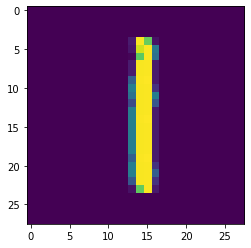

In [207]:
import matplotlib.pyplot as plt
plt.imshow(x_test[ind].reshape(28,28))
plt.show()

In [206]:
y_final_pred[ind]

1